In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras import layers, models

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import pandas as pd

In [6]:
train_set = pd.read_csv('drive/MyDrive/Corona_NLP_train.csv', encoding='latin-1', usecols=[4,5])[:1000]
test_set = pd.read_csv('drive/MyDrive/Corona_NLP_test.csv', encoding='latin-1', usecols=[4,5])[:100]

train_set.loc[train_set['Sentiment'] == 'Extremely Negative', 'Sentiment'] = 0
train_set.loc[train_set['Sentiment'] == 'Negative', 'Sentiment'] = 1
train_set.loc[train_set['Sentiment'] == 'Neutral', 'Sentiment'] = 2
train_set.loc[train_set['Sentiment'] == 'Positive', 'Sentiment'] = 3
train_set.loc[train_set['Sentiment'] == 'Extremely Positive', 'Sentiment'] = 4

test_set.loc[test_set['Sentiment'] == 'Extremely Negative', 'Sentiment'] = 0
test_set.loc[test_set['Sentiment'] == 'Negative', 'Sentiment'] = 1
test_set.loc[test_set['Sentiment'] == 'Neutral', 'Sentiment'] = 2
test_set.loc[test_set['Sentiment'] == 'Positive', 'Sentiment'] = 3
test_set.loc[test_set['Sentiment'] == 'Extremely Positive', 'Sentiment'] = 4

print(train_set)
print(test_set)

                                         OriginalTweet Sentiment
0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...         2
1    advice Talk to your neighbours family to excha...         3
2    Coronavirus Australia: Woolworths to give elde...         3
3    My food stock is not the only one which is emp...         3
4    Me, ready to go at supermarket during the #COV...         0
..                                                 ...       ...
995  Connectivity is essential during times of cris...         1
996  @standwithPrager Wells Fargo is committed to h...         4
997  @KariLeeAK907 Wells Fargo is committed to help...         4
998  @TheIndigoAuthor Wells Fargo is committed to h...         4
999  @WinAtLifeOnline Rest assured that our team is...         1

[1000 rows x 2 columns]
                                        OriginalTweet Sentiment
0   TRENDING: New Yorkers encounter empty supermar...         0
1   When I couldn't find hand sanitizer at Fred Me...         3
2  

In [7]:
# set up X and Y
num_labels = 5
vocab_size = 10000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_set.OriginalTweet)

x_train = tokenizer.texts_to_matrix(train_set.OriginalTweet, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_set.OriginalTweet, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train_set.Sentiment)
y_train = encoder.transform(train_set.Sentiment)
y_test = encoder.transform(test_set.Sentiment)

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (1000, 10000) (1000,)
test shapes: (100, 10000) (100,)
test first five labels: [0 3 4 1 2]


In [8]:
import keras.backend as K


model = models.Sequential()
model.add(layers.Dense(500, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(5, kernel_initializer='normal', activation='softmax'))
 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
9/9 [==============================] - 1s 83ms/step - loss: 1.7421 - accuracy: 0.2600 - val_loss: 1.6102 - val_accuracy: 0.2800
Epoch 2/30
9/9 [==============================] - 1s 67ms/step - loss: 0.5140 - accuracy: 0.9067 - val_loss: 1.5485 - val_accuracy: 0.3200
Epoch 3/30
9/9 [==============================] - 1s 66ms/step - loss: 0.1772 - accuracy: 0.9922 - val_loss: 1.5592 - val_accuracy: 0.3100
Epoch 4/30
9/9 [==============================] - 1s 65ms/step - loss: 0.0824 - accuracy: 0.9989 - val_loss: 1.5678 - val_accuracy: 0.3200
Epoch 5/30
9/9 [==============================] - 1s 65ms/step - loss: 0.0475 - accuracy: 0.9989 - val_loss: 1.5776 - val_accuracy: 0.3100
Epoch 6/30
9/9 [==============================] - 1s 66ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 1.5935 - val_accuracy: 0.3000
Epoch 7/30
9/9 [==============================] - 1s 66ms/step - loss: 0.0232 - accuracy: 0.9989 - val_loss: 1.6093 - val_accuracy: 0.3100
Epoch 8/30
9/9 [===========

In [9]:
print(x_test)
print(y_test)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.95946744 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.95159035 1.62451959 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0 3 4 1 2 2 3 2 0 4 3 0 0 4 3 0 4 2 3 4 1 4 4 4 0 3 1 1 1 3 1 4 0 0 2 0 1
 2 1 4 3 1 2 3 3 4 4 0 0 0 0 2 1 4 0 1 1 3 3 2 0 0 4 0 3 1 3 4 3 3 1 4 3 1
 2 0 1 3 3 3 0 1 4 1 1 1 1 2 1 1 1 1 3 1 1 4 2 4 0 2]
1/1 [==============================] - 0s 37ms/step - loss: 1.9284 - accuracy: 0.3800
Accuracy:  0.3799999952316284


In [10]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(5, kernel_initializer='normal', activation='softmax'))
 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
9/9 [==============================] - 104s 11s/step - loss: 1.6046 - accuracy: 0.2344 - val_loss: 1.6019 - val_accuracy: 0.2100
Epoch 2/30
9/9 [==============================] - 101s 11s/step - loss: 1.5935 - accuracy: 0.2622 - val_loss: 1.5945 - val_accuracy: 0.2100
Epoch 3/30
9/9 [==============================] - 100s 11s/step - loss: 1.5833 - accuracy: 0.2622 - val_loss: 1.5906 - val_accuracy: 0.2100
Epoch 4/30
9/9 [==============================] - 101s 11s/step - loss: 1.5788 - accuracy: 0.2622 - val_loss: 1.5900 - val_accuracy: 0.3000
Epoch 5/30
9/9 [==============================] - 106s 12s/step - loss: 1.5778 - accuracy: 0.2589 - val_loss: 1.5911 - val_accuracy: 0.2100
Epoch 6/30
9/9 [==============================] - 103s 11s/step - loss: 1.5781 - accuracy: 0.2489 - val_loss: 1.5914 - val_accuracy: 0.2100
Epoch 7/30
9/9 [==============================] - 102s 11s/step - loss: 1.5779 - accuracy: 0.2333 - val_loss: 1.5911 - val_accuracy: 0.2100
Epoch 8/30
9/9 [====

In [11]:
print(x_test)
print(y_test)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.95946744 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.95159035 1.62451959 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0 3 4 1 2 2 3 2 0 4 3 0 0 4 3 0 4 2 3 4 1 4 4 4 0 3 1 1 1 3 1 4 0 0 2 0 1
 2 1 4 3 1 2 3 3 4 4 0 0 0 0 2 1 4 0 1 1 3 3 2 0 0 4 0 3 1 3 4 3 3 1 4 3 1
 2 0 1 3 3 3 0 1 4 1 1 1 1 2 1 1 1 1 3 1 1 4 2 4 0 2]
1/1 [==============================] - 1s 567ms/step - loss: 1.6062 - accuracy: 0.2100
Accuracy:  0.20999999344348907


In [13]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(5, kernel_initializer='normal', activation='softmax'))
 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/20
9/9 [==============================] - 159s 12s/step - loss: 1.6020 - accuracy: 0.2289 - val_loss: 1.5920 - val_accuracy: 0.2100
Epoch 2/20
9/9 [==============================] - 110s 12s/step - loss: 1.5825 - accuracy: 0.2567 - val_loss: 1.5866 - val_accuracy: 0.3000
Epoch 3/20
9/9 [==============================] - 113s 13s/step - loss: 1.5799 - accuracy: 0.2533 - val_loss: 1.5884 - val_accuracy: 0.3000
Epoch 4/20
9/9 [==============================] - 110s 12s/step - loss: 1.5794 - accuracy: 0.2489 - val_loss: 1.5880 - val_accuracy: 0.3000
Epoch 5/20
9/9 [==============================] - 115s 13s/step - loss: 1.5790 - accuracy: 0.2511 - val_loss: 1.5883 - val_accuracy: 0.3000
Epoch 6/20
9/9 [==============================] - 111s 12s/step - loss: 1.5785 - accuracy: 0.2533 - val_loss: 1.5898 - val_accuracy: 0.3000
Epoch 7/20
9/9 [==============================] - 113s 13s/step - loss: 1.5786 - accuracy: 0.2467 - val_loss: 1.5919 - val_accuracy: 0.3000
Epoch 8/20
9/9 [====

In [14]:
print(x_test)
print(y_test)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.95946744 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.95159035 1.62451959 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0 3 4 1 2 2 3 2 0 4 3 0 0 4 3 0 4 2 3 4 1 4 4 4 0 3 1 1 1 3 1 4 0 0 2 0 1
 2 1 4 3 1 2 3 3 4 4 0 0 0 0 2 1 4 0 1 1 3 3 2 0 0 4 0 3 1 3 4 3 3 1 4 3 1
 2 0 1 3 3 3 0 1 4 1 1 1 1 2 1 1 1 1 3 1 1 4 2 4 0 2]
1/1 [==============================] - 2s 2s/step - loss: 1.6054 - accuracy: 0.2100
Accuracy:  0.20999999344348907


{'labels': [2, 3, 0, 1, 4]}
{'counts': [166, 257, 163, 266, 148]}


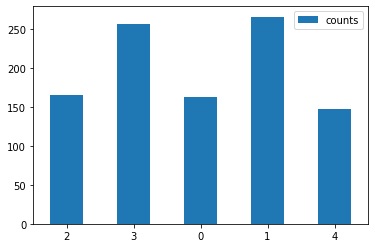

In [25]:
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(train_set.Sentiment)

labels = {'labels': list(counts.keys())}
instances = {'counts': list(counts.values())}

df = pd.DataFrame(instances, index=list(counts.keys()))

print(labels)
print(instances)

ax = df.plot.bar(rot=0)